In [7]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e6eb2018-ab9b-484f-99e5-0a1fc831c697',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-12-01T18:43:30.111Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 8961}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9864, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [8]:
type(data)

dict

In [10]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [11]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9864,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.922184e+07,1.922184e+07,NaN,1,NaN,NaN,None,2022-12-01T18:42:00.000Z,16930.184665,2.663227e+10,3.4645,-0.300186,0.159150,2.045070,-17.154940,-11.823579,-15.274236,3.254294e+11,38.1352,3.555339e+11,None,2022-12-01T18:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 18:44:53.131702
1,1027,Ethereum,ETH,ethereum,6244,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-12-01T18:42:00.000Z,1273.577043,8.288077e+09,-3.2175,-0.020758,-0.300294,6.037183,-19.370369,-1.736394,-19.609021,1.558525e+11,18.2610,1.558525e+11,None,2022-12-01T18:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 18:44:53.131702
2,825,Tether,USDT,tether,43477,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.536268e+10,7.314177e+10,NaN,3,NaN,NaN,None,2022-12-01T18:42:00.000Z,1.000007,3.437226e+10,3.9892,-0.003385,0.004136,0.061612,0.007728,-0.001909,-0.008755,6.536314e+10,7.6634,7.314228e+10,None,2022-12-01T18:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-01 18:44:53.131702
3,1839,BNB,BNB,bnb,1148,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599705e+08,1.599800e+08,NaN,4,NaN,NaN,None,2022-12-01T18:42:00.000Z,291.646403,1.511237e+09,65.8690,0.096349,-2.443037,-2.549413,-9.880179,2.646219,5.072580,4.665482e+10,5.4672,5.832928e+10,None,2022-12-01T18:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 18:44:53.131702
4,3408,USD Coin,USDC,usd-coin,8104,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.308070e+10,4.308070e+10,NaN,5,NaN,NaN,None,2022-12-01T18:42:00.000Z,1.000009,2.922147e+09,-1.5153,-0.006330,-0.008010,-0.016018,0.008104,-0.008249,-0.001281,4.308111e+10,5.0477,4.308111e+10,None,2022-12-01T18:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-01 18:44:53.131702
5,4687,Binance USD,BUSD,binance-usd,5652,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.223403e+10,2.223403e+10,NaN,6,NaN,NaN,None,2022-12-01T18:42:00.000Z,1.000014,8.643984e+09,12.4104,-0.043904,-0.035458,-0.027355,0.011499,0.007898,-0.018523,2.223434e+10,2.6052,2.223434e+10,None,2022-12-01T18:42:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-12-01 18:44:53.131702
6,52,XRP,XRP,xrp,852,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.029003e+10,9.998921e+10,NaN,7,NaN,NaN,None,2022-12-01T18:42:00.000Z,0.396601,8.492776e+08,-7.9479,0.067155,-0.572772,-0.272694,-14.188617,-13.708070,20.904144,1.994507e+10,2.3367,3.966010e+10,None,2022-12-01T18:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 18:44:53.131702
7,74,Dogecoin,DOGE,dogecoin,606,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,None,2022-12-01T18:42:00.000Z,0.101695,1.084666e+09,-9.9308,-0.325146,-0.996387,25.231022,-27.129684,69.324920,65.452252,1.349197e+10,1.5810,1.349197e+10,None,2022-12-01T18:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 18:44:53.131702
8,2010,Cardano,ADA,cardano,601,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.444666e+10,3.519381e+10,NaN,9,NaN

In [24]:
 def api_runner():
    global df   
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e6eb2018-ab9b-484f-99e5-0a1fc831c697',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df
    
#create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\Administrator\.ipython\extensions\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\Administrator\.ipython\extensions\Python Scripts\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Administrator\.ipython\extensions\Python Scripts\API.csv', mode='a', header=False)
    df = pd.read_csv(r'C:\Users\Administrator\.ipython\extensions\Python Scripts\API.csv')

In [25]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2022-12-01T19:25:56.596Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 8961}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9864, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

KeyboardInterrupt: 

In [26]:
df72 = pd.read_csv(r'C:\Users\Administrator\.ipython\extensions\Python Scripts\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9864,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.922184e+07,1.922184e+07,NaN,1,NaN,NaN,NaN,2022-12-01T19:09:00.000Z,16931.897849,2.580932e+10,-1.9273,-0.273448,-0.258304,2.129432,-17.298261,-12.004592,-15.230259,3.254623e+11,38.1420,3.555699e+11,NaN,2022-12-01T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 19:11:17.086910
1,1,1027,Ethereum,ETH,ethereum,6244,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2022-12-01T19:09:00.000Z,1273.925176,7.926924e+09,-9.6402,-0.137191,-0.694191,5.918084,-19.555677,-1.885987,-19.409127,1.558951e+11,18.2738,1.558951e+11,NaN,2022-12-01T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 19:11:17.086910
2,2,825,Tether,USDT,tether,43480,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.536268e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2022-12-01T19:09:00.000Z,1.000032,3.352379e+10,-0.2652,-0.000906,0.006169,0.062309,0.011082,0.000916,-0.005160,6.536477e+10,7.6620,7.314411e+10,NaN,2022-12-01T19:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-01 19:11:17.086910
3,3,1839,BNB,BNB,bnb,1148,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.0,1.599705e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2022-12-01T19:09:00.000Z,291.579591,1.492799e+09,62.0738,-0.189091,-2.406510,-2.549846,-10.264523,2.288731,5.031415,4.664413e+10,5.4685,5.831592e+10,NaN,2022-12-01T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 19:11:17.086910
4,4,3408,USD Coin,USDC,usd-coin,8110,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.308070e+10,4.308070e+10,NaN,5,NaN,NaN,NaN,2022-12-01T19:09:00.000Z,0.999920,2.857030e+09,-5.1200,-0.025055,-0.028766,-0.020457,-0.018167,-0.009861,-0.008354,4.307727e+10,5.0495,4.307727e+10,NaN,2022-12-01T19:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-01 19:11:17.086910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,10,6636,Polkadot,DOT,polkadot-new,433,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.140719e+09,1.256743e+09,NaN,11,9.048698e+08,4.880238e+09,NaN,2022-12-01T19:24:00.000Z,5.393305,1.783223e+08,-10.4282,0.045293,-1.107758,0.393671,-17.209832,-14.340337,-26.706960,6.152244e+09,0.7212,6.777995e+09,NaN,2022-12-01T19:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 19:25:57.116035
221,11,4943,Dai,DAI,multi-collateral-dai,1668,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'asset-backed-stablecoi...",NaN,5.663511e+09,5.663511e+09,NaN,12,NaN,NaN,NaN,2022-12-01T19:24:00.000Z,0.999751,2.830043e+08,-1.2486,0.001112,-0.026580,-0.045531,0.002043,-0.018933,0.058631,5.662102e+09,0.6638,5.662102e+09,NaN,2022-12-01T19:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2022-12-01 19:25:57.116035
222,12,2,Litecoin,LTC,litecoin,851,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.0,7.173483e+07,8.400000e+07,NaN,13,NaN,NaN,NaN,2022-12-01T19:25:00.000Z,77.647221,7.186217e+08,5.0062,0.078948,-1.617060,-0.587183,40.350899,46.331410,27.261921,5.570010e+09,0.6

In [27]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9864,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.922184e+07,1.922184e+07,NaN,1,NaN,NaN,NaN,2022-12-01T19:09:00.000Z,16931.897849,2.580932e+10,-1.9273,-0.273448,-0.258304,2.129432,-17.298261,-12.004592,-15.230259,3.254623e+11,38.1420,3.555699e+11,NaN,2022-12-01T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 19:11:17.086910
1,1,1027,Ethereum,ETH,ethereum,6244,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2022-12-01T19:09:00.000Z,1273.925176,7.926924e+09,-9.6402,-0.137191,-0.694191,5.918084,-19.555677,-1.885987,-19.409127,1.558951e+11,18.2738,1.558951e+11,NaN,2022-12-01T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 19:11:17.086910
2,2,825,Tether,USDT,tether,43480,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.536268e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2022-12-01T19:09:00.000Z,1.000032,3.352379e+10,-0.2652,-0.000906,0.006169,0.062309,0.011082,0.000916,-0.005160,6.536477e+10,7.6620,7.314411e+10,NaN,2022-12-01T19:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-01 19:11:17.086910
3,3,1839,BNB,BNB,bnb,1148,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.0,1.599705e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2022-12-01T19:09:00.000Z,291.579591,1.492799e+09,62.0738,-0.189091,-2.406510,-2.549846,-10.264523,2.288731,5.031415,4.664413e+10,5.4685,5.831592e+10,NaN,2022-12-01T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 19:11:17.086910
4,4,3408,USD Coin,USDC,usd-coin,8110,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.308070e+10,4.308070e+10,NaN,5,NaN,NaN,NaN,2022-12-01T19:09:00.000Z,0.999920,2.857030e+09,-5.1200,-0.025055,-0.028766,-0.020457,-0.018167,-0.009861,-0.008354,4.307727e+10,5.0495,4.307727e+10,NaN,2022-12-01T19:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-01 19:11:17.086910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,10,6636,Polkadot,DOT,polkadot-new,433,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.140719e+09,1.256743e+09,NaN,11,9.048698e+08,4.880238e+09,NaN,2022-12-01T19:24:00.000Z,5.393305,1.783223e+08,-10.4282,0.045293,-1.107758,0.393671,-17.209832,-14.340337,-26.706960,6.152244e+09,0.7212,6.777995e+09,NaN,2022-12-01T19:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 19:25:57.116035
221,11,4943,Dai,DAI,multi-collateral-dai,1668,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'asset-backed-stablecoi...",NaN,5.663511e+09,5.663511e+09,NaN,12,NaN,NaN,NaN,2022-12-01T19:24:00.000Z,0.999751,2.830043e+08,-1.2486,0.001112,-0.026580,-0.045531,0.002043,-0.018933,0.058631,5.662102e+09,0.6638,5.662102e+09,NaN,2022-12-01T19:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2022-12-01 19:25:57.116035
222,12,2,Litecoin,LTC,litecoin,851,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.0,7.173483e+07,8.400000e+07,NaN,13,NaN,NaN,NaN,2022-12-01T19:25:00.000Z,77.647221,7.186217e+08,5.0062,0.078948,-1.617060,-0.587183,40.350899,46.331410,27.261921,5.570010e+09,0.6

In [28]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [29]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9864,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19221843.00000,19221843.00000,NaN,1,NaN,NaN,NaN,2022-12-01T19:09:00.000Z,16931.89785,25809318868.63074,-1.92730,-0.27345,-0.25830,2.12943,-17.29826,-12.00459,-15.23026,325462282149.47443,38.14200,355569854833.32001,NaN,2022-12-01T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 19:11:17.086910
1,1,1027,Ethereum,ETH,ethereum,6244,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2022-12-01T19:09:00.000Z,1273.92518,7926923958.45850,-9.64020,-0.13719,-0.69419,5.91808,-19.55568,-1.88599,-19.40913,155895149006.48340,18.27380,155895149006.48001,NaN,2022-12-01T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 19:11:17.086910
2,2,825,Tether,USDT,tether,43480,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,65362681003.31440,73141766321.23428,NaN,3,NaN,NaN,NaN,2022-12-01T19:09:00.000Z,1.00003,33523794992.72741,-0.26520,-0.00091,0.00617,0.06231,0.01108,0.00092,-0.00516,65364772177.61678,7.66200,73144106374.91000,NaN,2022-12-01T19:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-01 19:11:17.086910
3,3,1839,BNB,BNB,bnb,1148,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,159970489.96763,159979963.59043,NaN,4,NaN,NaN,NaN,2022-12-01T19:09:00.000Z,291.57959,1492799430.84230,62.07380,-0.18909,-2.40651,-2.54985,-10.26452,2.28873,5.03142,46644129959.90410,5.46850,58315918103.82000,NaN,2022-12-01T19:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 19:11:17.086910
4,4,3408,USD Coin,USDC,usd-coin,8110,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,43080698920.59752,43080698920.59752,NaN,5,NaN,NaN,NaN,2022-12-01T19:09:00.000Z,0.99992,2857030274.87387,-5.12000,-0.02505,-0.02877,-0.02046,-0.01817,-0.00986,-0.00835,43077272487.74482,5.04950,43077272487.74000,NaN,2022-12-01T19:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-01 19:11:17.086910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,10,6636,Polkadot,DOT,polkadot-new,433,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1140718899.06126,1256742569.36644,NaN,11,904869778.00000,4880238324.61203,NaN,2022-12-01T19:24:00.000Z,5.39330,178322303.70918,-10.42820,0.04529,-1.10776,0.39367,-17.20983,-14.34034,-26.70696,6152244471.14643,0.72120,6777995464.44000,NaN,2022-12-01T19:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-01 19:25:57.116035
221,11,4943,Dai,DAI,multi-collateral-dai,1668,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'asset-backed-stablecoi...",NaN,5663511314.97894,5663511314.97894,NaN,12,NaN,NaN,NaN,2022-12-01T19:24:00.000Z,0.99975,283004257.12214,-1.24860,0.00111,-0.02658,-0.04553,0.00204,-0.01893,0.05863,5662101651.16214,0.66380,5662101651.16000,NaN,2022-12-01T19:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2022-12-01 19:25:57.116035
222,12,2,Litecoin,LTC,litecoin,851,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.00000,71734831.22841,84000000.00000

In [30]:
#coin trends over time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.26158,-0.60249,2.16501,-17.31673,-12.26525,-15.18404
Ethereum,-0.16171,-1.18173,5.99138,-19.53091,-2.48441,-19.28879
Tether,-0.00103,0.00687,0.06400,0.01128,0.00117,-0.00363
BNB,-0.20987,-2.65038,-2.47415,-10.16561,1.91811,5.13977
USD Coin,-0.00729,-0.02276,-0.01052,-0.00104,-0.00820,0.00459
Binance USD,-0.01899,-0.01183,-0.04289,-0.02373,-0.01630,-0.00731
XRP,-0.38075,-1.99720,-0.52549,-14.55823,-14.38825,20.44016
Dogecoin,-0.52840,-2.68099,24.95419,-27.32599,68.73534,65.35145
Cardano,-0.47904,-0.17768,-0.14705,-22.01154,-26.38784,-30.73107


In [31]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     -0.26158
         quote.USD.percent_change_24h    -0.60249
         quote.USD.percent_change_7d      2.16501
         quote.USD.percent_change_30d   -17.31673
         quote.USD.percent_change_60d   -12.26525
                                           ...   
TRON     quote.USD.percent_change_24h    -0.21867
         quote.USD.percent_change_7d      2.59535
         quote.USD.percent_change_30d   -13.67425
         quote.USD.percent_change_60d   -12.15159
         quote.USD.percent_change_90d   -13.44761
Length: 90, dtype: float64

In [32]:
type(df4)

pandas.core.series.Series

In [33]:
df5 = df4.to_frame(name='values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.26158
        quote.USD.percent_change_24h  -0.60249
        quote.USD.percent_change_7d    2.16501
        quote.USD.percent_change_30d -17.31673
        quote.USD.percent_change_60d -12.26525
...                                        ...
TRON    quote.USD.percent_change_24h  -0.21867
        quote.USD.percent_change_7d    2.59535
        quote.USD.percent_change_30d -13.67425
        quote.USD.percent_change_60d -12.15159
        quote.USD.percent_change_90d -13.44761

[90 rows x 1 columns]

In [34]:
df5.count()

values    90
dtype: int64

In [36]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.26158
1,Bitcoin,quote.USD.percent_change_24h,-0.60249
2,Bitcoin,quote.USD.percent_change_7d,2.16501
3,Bitcoin,quote.USD.percent_change_30d,-17.31673
4,Bitcoin,quote.USD.percent_change_60d,-12.26525
...,...,...,...
85,TRON,quote.USD.percent_change_24h,-0.21867
86,TRON,quote.USD.percent_change_7d,2.59535
87,TRON,quote.USD.percent_change_30d,-13.67425
88,TRON,quote.USD.percent_change_60d,-12.15159


In [37]:
#rename colum

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.26158
1,Bitcoin,quote.USD.percent_change_24h,-0.60249
2,Bitcoin,quote.USD.percent_change_7d,2.16501
3,Bitcoin,quote.USD.percent_change_30d,-17.31673
4,Bitcoin,quote.USD.percent_change_60d,-12.26525
...,...,...,...
85,TRON,quote.USD.percent_change_24h,-0.21867
86,TRON,quote.USD.percent_change_7d,2.59535
87,TRON,quote.USD.percent_change_30d,-13.67425
88,TRON,quote.USD.percent_change_60d,-12.15159


In [40]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.26158
1,Bitcoin,24h,-0.60249
2,Bitcoin,7d,2.16501
3,Bitcoin,30d,-17.31673
4,Bitcoin,60d,-12.26525
...,...,...,...
85,TRON,24h,-0.21867
86,TRON,7d,2.59535
87,TRON,30d,-13.67425
88,TRON,60d,-12.15159


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

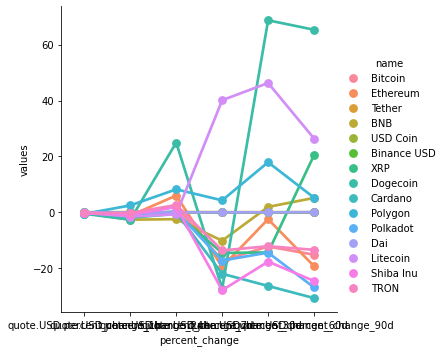

In [39]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [41]:
#create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,16931.89785,2022-12-01 19:11:17.086910
15,Bitcoin,16926.21425,2022-12-01 19:12:18.105161
30,Bitcoin,16926.17056,2022-12-01 19:13:19.259028
45,Bitcoin,16925.03492,2022-12-01 19:14:20.419601
60,Bitcoin,16919.80015,2022-12-01 19:15:21.528256
75,Bitcoin,16919.80015,2022-12-01 19:16:22.665278
90,Bitcoin,16923.92997,2022-12-01 19:17:24.003591
105,Bitcoin,16926.30615,2022-12-01 19:18:25.431161
120,Bitcoin,16927.04571,2022-12-01 19:19:26.659819
135,Bitcoin,16932.19960,2022-12-01 19:20:28.072088


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

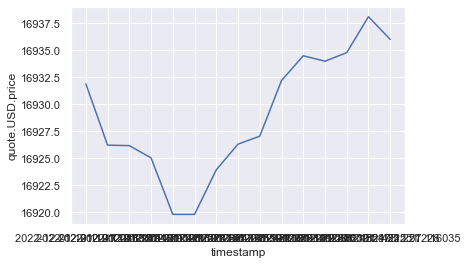

In [42]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)